(-1.5, 1.5)

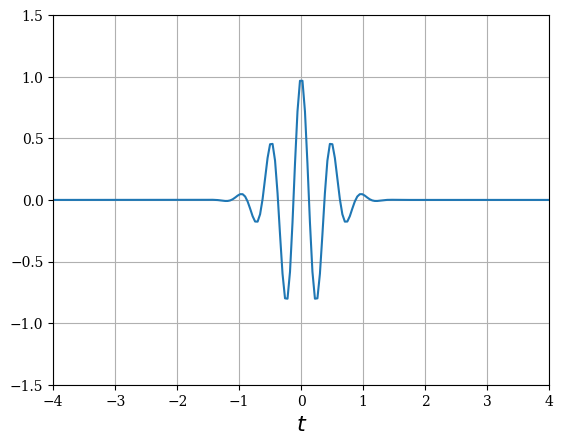

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-np.pi*t**2)*np.cos(4*np.pi*t)

# affichage du signal
tmin=-4.0
tmax=4.0
N=200
t=np.linspace(tmin,tmax,N)
plt.figure(1)
plt.plot(t, f(t))
plt.grid()
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.xlabel(f'$t$',fontsize=16)
plt.xlim([-4,4])
plt.ylim([-1.5,1.5])

Text(0.5, 1.0, 'phase')

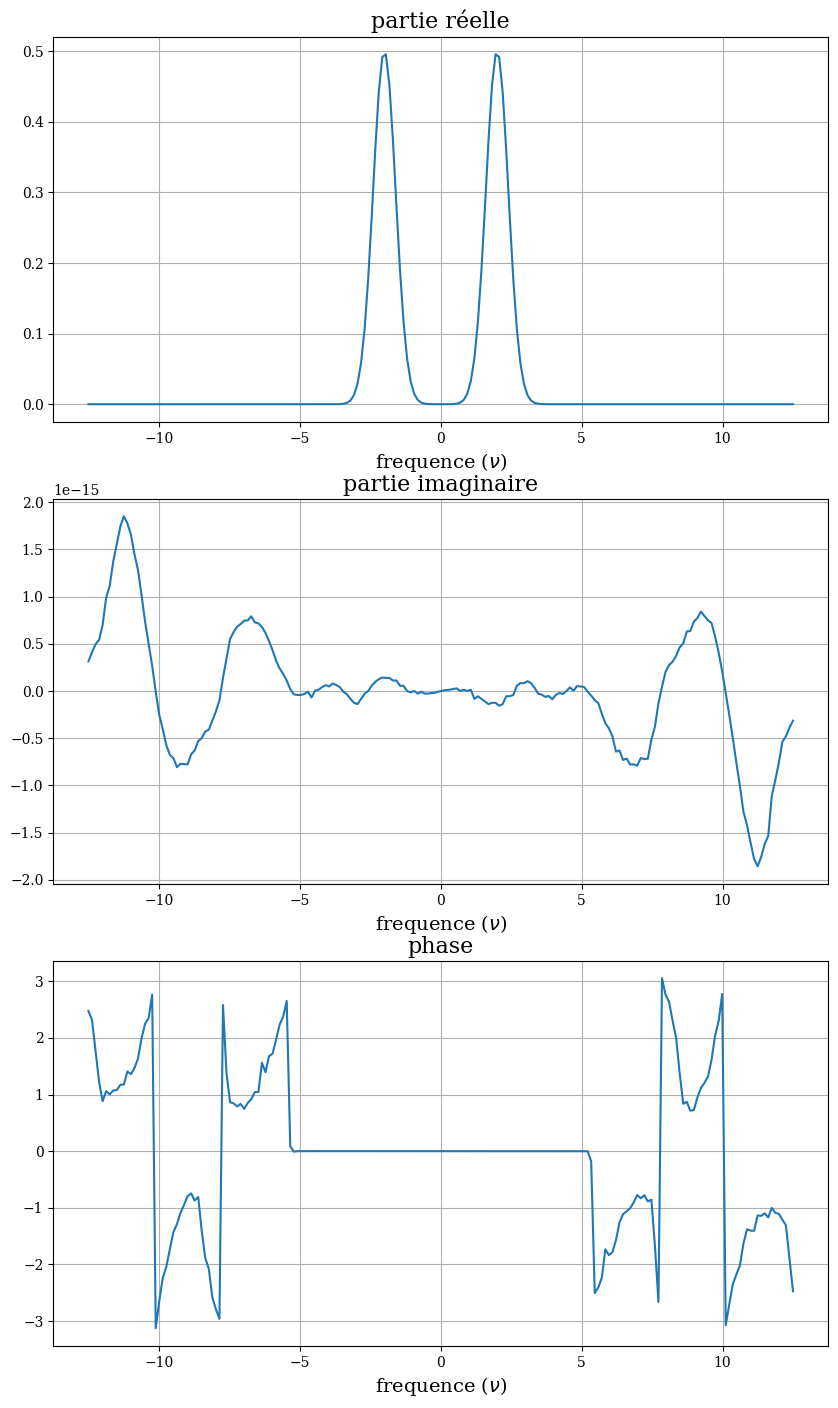

In [4]:
# domaine fréquentiel
Te=(tmax-tmin)/N  
nu_e=1/Te
nu=np.linspace(-nu_e/2,nu_e/2,N)  # même nbre de points que dans t

# calcul de transformée de Fourier de f
tf=[]
tf_real=[]
tf_imag=[]
tf_phase=[]
for k in range(N):

    # partie réelle
    tmp_real=np.trapezoid(f(t)*np.cos(2*np.pi*nu[k]*t),t)
    tf_real.append(tmp_real)

    # partie imaginaire
    tmp_imag=np.trapezoid(f(t)*np.sin(2*np.pi*nu[k]*t),t)
    tf_imag.append(tmp_imag)

    # phase
    tmp_phase=np.angle(tmp_real+1j*tmp_imag)
    tf_phase.append(tmp_phase)

##### affichage
plt.figure(figsize=(10,17))

# partie réelle
plt.subplot(3,1,1)
plt.plot(nu,tf_real)
plt.grid()
plt.xlabel(r'frequence ($\nu$)',fontsize=14)
plt.title('partie réelle',fontsize=16)

# partie imaginaire
plt.subplot(3,1,2)
plt.plot(nu, tf_imag)
plt.grid()
plt.xlabel(r'frequence ($\nu$)',fontsize=14)
plt.title('partie imaginaire',fontsize=16)

# phase
plt.subplot(3,1,3)
plt.plot(nu,tf_phase)
plt.grid()
plt.xlabel(r'frequence ($\nu$)',fontsize=14)
plt.title('phase',fontsize=16)

# f est une fonction paire lorsque l'on fait la transformée du produit on a le produit de cnvolution des TF 
#2 gaussiennes  en -2 et +2 
#convoluer un siganl par un dirac ca decale la fonction
#pourquoi 2? car cos (2*2*pi*t) d'ou le 2